# Семинар №2

https://huggingface.co/ - платформа для машинного обучения, в ней хранится множество предобученных моделей и датасетов, доступных для общего пользования.

### Библиотека Datasets

🤗 Datasets - это библиотека, необходимая для использования датасетов с Huggingface.

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
# посмотреть описание датасета без загрузки
from datasets import load_dataset_builder

ds_builder = load_dataset_builder("rotten_tomatoes")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

In [4]:
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [5]:
# загрузка датасета
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [7]:
# посмотреть сплиты
from datasets import get_dataset_split_names

get_dataset_split_names("rotten_tomatoes")

['train', 'validation', 'test']

In [8]:
# загрузка тренировочного датасета
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes", split="train")
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [9]:
# посмотреть доступные конфигурации
from datasets import get_dataset_config_names

configs = get_dataset_config_names("PolyAI/minds14")
configs

minds14.py:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


['cs-CZ',
 'de-DE',
 'en-AU',
 'en-GB',
 'en-US',
 'es-ES',
 'fr-FR',
 'it-IT',
 'ko-KR',
 'nl-NL',
 'pl-PL',
 'pt-PT',
 'ru-RU',
 'zh-CN',
 'all']

In [10]:
# разрешить запуск скрипта
get_dataset_config_names("PolyAI/minds14", trust_remote_code=True)

['cs-CZ',
 'de-DE',
 'en-AU',
 'en-GB',
 'en-US',
 'es-ES',
 'fr-FR',
 'it-IT',
 'ko-KR',
 'nl-NL',
 'pl-PL',
 'pt-PT',
 'ru-RU',
 'zh-CN',
 'all']

In [11]:
# указываем нужную конфигурацию
mindsFR = load_dataset("PolyAI/minds14", "fr-FR", split="train")

MInDS-14.zip:   0%|          | 0.00/471M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Существует 2 типа датасет объектов:
- **Dataset** - загружает весь датасет и обеспечивает быстрый доступ к нему
- **IterableDataset** - используется для больших датасетов, которые не помещаются в памяти целиком. Доступ к ним осуществляется по одной записи.

#### Dataset

In [12]:
# индексация
dataset[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [13]:
dataset[-1]

{'text': 'things really get weird , though not particularly scary : the movie is all portent and no content .',
 'label': 0}

In [14]:
# получить все записи столбца
dataset["text"]

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
 'effective but too-tepid biopic',
 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
 "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",
 'the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .',
 'offers that rare combination of entertainment and education .',
 'perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .',
 "steers turns i

In [15]:
# первая запись
dataset[0]["text"]

'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .'

In [16]:
# обращение по имени столбца медленее, чем по индексу
import time

start_time = time.time()
text = dataset[0]["text"]
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

start_time = time.time()
text = dataset["text"][0]
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

Elapsed time: 0.0013 seconds
Elapsed time: 0.0127 seconds


In [17]:
# получить срез
dataset[3:6]

{'text': ['if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
  "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .",
  'the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .'],
 'label': [1, 1, 1]}

#### IterableDataset

In [18]:
# атрибут streaming
from datasets import load_dataset

iterable_dataset = load_dataset("food101", split="train", streaming=True)
for example in iterable_dataset:
    print(example)
    break

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

{'image': <PIL.Image.Image image mode=RGB size=384x512 at 0x7892646F1030>, 'label': 6}


In [19]:
# можно создать IterableDataset из обычного
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes", split="train")
iterable_dataset = dataset.to_iterable_dataset()

In [20]:
next(iter(iterable_dataset))

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [21]:
# получить несколько первых записей
list(iterable_dataset.take(3))

[{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'label': 1},
 {'text': 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'label': 1},
 {'text': 'effective but too-tepid biopic', 'label': 1}]

https://huggingface.co/docs/datasets/about_mapstyle_vs_iterable - подробнее про разницу между Dataset и IterableDataset
https://huggingface.co/docs/datasets/package_reference/main_classes - полная документация по библиотеке Datasets

## Библиотека SpaCy

https://spacy.io/ - библиотека для обработки естественного языка.

bcdfffe5c0b9f221a2f6607f96ca0e4a.svg

### Nlp object

In [22]:
import spacy

# создание пустого nlp объекта
nlp = spacy.blank("en")

- содержит пайплайн для обработки текста
- задаёт языковые правила для токенизации

### Doc object

In [23]:
# создаётся doc объект в результате обработки текста nlp объектом
doc = nlp("Hello world!")

# итерация по токенам в объекте Doc
for token in doc:
    print(token.text)

Hello
world
!


### Token object

In [24]:
doc = nlp("Hello world!")

# объект Token можно получить из объекта Doc с помощью индексации
token = doc[1]

# используем атрибут для получения значение токена
print(token.text)

world


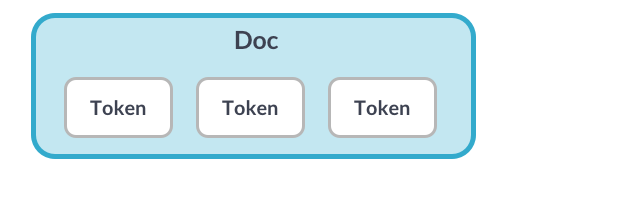

### Span object

- это срез объекта Doc, содержащий несколько объектов Token. Является представлением, т.е. не содержит в себе самих данных.

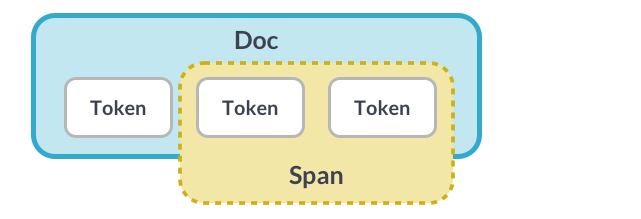

In [25]:
doc = nlp("Hello world!")

span = doc[1:3]
print(span.text)

world!


### Лексические атрибуты токенов

In [26]:
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2]
Text:     ['Hello', 'world', '!']
is_alpha: [True, True, False]
is_punct: [False, False, True]
like_num: [False, False, False]


### Претренированные пайплайны

- это модели, обученные на размеченных текстах, которые помогают spaCy предсказывать лингвистические атрибуты в контексте. Например:
 - Частеречные тэги
 - Синтаксические зависимости
 - Именованные сущности

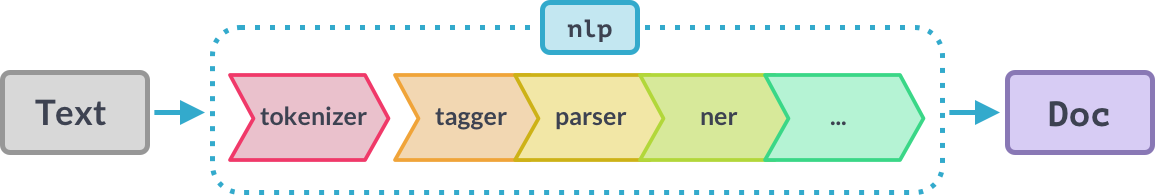

In [27]:
# установка готового пайплайна для русского языка
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 94.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
# загрузка пайплайна
nlp = spacy.load("ru_core_news_sm")

In [29]:
# компоненты пайплайна
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [30]:
# предсказываем части речи по контексту
import spacy

# создаём nlp объект для обработки текста
doc = nlp("Я люблю пиццу!")

# итерация по токенам
for token in doc:
    # части речи
    print(token.text, token.pos_)

Я PRON
люблю VERB
пиццу NOUN
! PUNCT


In [31]:
# ситнаксические зависимости
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Я PRON nsubj люблю
люблю VERB ROOT люблю
пиццу NOUN obj люблю
! PUNCT punct люблю


In [32]:
# распознавание именованных сущностей
doc = nlp("Даня Милохин отказался приезжать из Дубая в Россию после поджога дома приёмного отца и подброшенной записки с предложением отправить тиктокера на СВО.")

# итерация по именованным сущностям
for ent in doc.ents:
    print(ent.text, ent.label_)

Даня Милохин PER
Дубая LOC
Россию LOC
СВО ORG


In [33]:
spacy.explain('PER')

'Named person or family.'

## sklearn.Pipeline + GridSearchCV

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [35]:
classifier = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('cls', LogisticRegression(random_state=42))
])

In [36]:
classifier.named_steps

{'vectorizer': TfidfVectorizer(), 'cls': LogisticRegression(random_state=42)}

Основные гиперпараметры логистической регрессии:

**1. penalty**
- *L1 Regularization( lasso regression)* - это метод регуляризации, который используется для уменьшения значений коэффициентов уравнения, т.е. это метод исключения признаков, поскольку он сводит значения коэффициентов точно к нулю.
- *L2 Regularization (гребневая регрессия)* - метод регуляризации, который используется для уменьшения значений коэффициентов не точно, но почти до нуля.
- *Elastic Net Regularization* - комбинация L1 и L2.

**2. tol (tolerance)** - это критерий остановки градиентного спуска, значение этого параметра по умолчанию равно 1e-4. Если значение остается небольшим, то обучение полностью зависит от количества итераций, или если значение большое, то градиентный спуск прекращается раньше.

**3. C (Inverse of Regularization)** - этот гиперпараметр очень важен, когда мы используем регуляризацию, поскольку он является обратным параметру регуляризации, значение по умолчанию равно 1.0. В принципе, разброс значений при использовании методов регуляризации довольно схож: чем меньше значения, тем сильнее регуляризация, и чем больше значения, тем меньше регуляризация.

**4. solver** - это алгоритмы, используемые для оптимизации производительности модели путем поиска наиболее подходящих параметров, которые минимизируют функцию потерь. Каждый solver обладает различными характеристиками и подходит для различных типов наборов данных и сценариев.

- *lbfgs*: Хороший выбор по умолчанию, подходящий для наборов данных малого и среднего размера.
- *liblinear*: Лучше всего подходит для небольших наборов данных.
- *newton-cg*: Хорошо работает как для небольших, так и для больших наборов данных, особенно для задач многоклассовой классификации.
- *sag and saga*: Быстрее для больших наборов данных.
- *newton-cholesky*: Подходит для наборов данных, содержащих больше признаков, чем объектов, особенно для категориальных объектов с однократным кодированием.

**5. max_iter** - максимальное количество итераций обучения

**6. verbose** - параметр управляет подробностью процесса обучения, который определяет, следует ли отображать подробные журналы и информацию о ходе выполнения во время обучения модели.

**7. n_jobs** - указывает количество процессорных ядер, которые будут использоваться во время вычисления.

Этот гиперпараметр используется для распараллеливания процесса обучения, что потенциально ускоряет вычисления за счет использования нескольких процессорных ядер.

- *n_jobs = -1*: Использует все доступные ядра процессора.
- *n_jobs > 0*: Указывает точное количество используемых ядер.
- *n_jobs = 1*: (по умолчанию) Не использует параллельную обработку.

In [ ]:
cv = GridSearchCV(
    estimator=classifier,
    param_grid={
        'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'cls__C': [1e-1, 1, 10, 100, 1000],
        'cls__penalty': ['l1', 'l2']
    },
    scoring='f1_macro',
    cv=5,
    refit=True,
    n_jobs=-1,
    verbose=True
)

https://www.dmitrymakarov.ru/opt/logistic-regression-05/?ysclid=m17zpir6gs554264557 - подробно про логистическую регрессию
https://translated.turbopages.org/proxy_u/en-ru.ru.3c917922-66eae64d-8f524656-74722d776562/https/www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/ - про оптимизацию логистической регрессии